# 이미지 프로세싱을 이용한 나무 전정 가이드라인 :   프로젝트 설명 

In [1]:
from IPython.display import Image

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

plt.style.use('dark_background')

나무를 자르는 법에 관한 다큐멘터리를 본 적 있다. 나무는 동물과 달리 상처가 아물지 못하고 상처를 에워싸는 방벽을 세워 구획화 한 후 나머지 조직으로 살아산다. 이때 나무의 구획화가 이루어지는 가지깃 부위를 손상시키며 나무를 자르면 나무가 회복하지 못한 채 썩게 된다. 한국의 가로수들은 올바르게 나무를 자르지 않아 썩은 경우가 많다. 

![img](12.png)

나무를 적절치 못하게 잘랐을 때는 이렇게 썩게 된다.  

![img](12345.png)

나무의 구획화가 적절히 이루어지면 이렇게 잘 회복할 수 있다. 

![img](123.png)

그래서 가지깃을 훼손하지 않고 적절히 잘라야 한다. 이때 어떻게 잘라야 가지깃을 손상시키지 않고 자를지 잘 모르는 사람들을 위해, '나무를 이 선을 따라 자르세요'라고 알려주는 프로그램을 만들었다. 

opencv, matplotlib, numpy 를 이용했다. 

![img](expectation.jpg)

원하는 예상 결과는 이런 모습이다. 

opencv 란 open source computer vision 의 약자로, 영상, 동영상 처리를 할 수 있는 라이브러리이다. 이걸 사용하면 윤곽선 검출, 노이즈 제거 등을 할 수 있어 자동차 번호판 인식기 등을 만들 수 있다. 나는 파이썬 아나콘다 주피터노트북 개발환경에서 opencv 를 사용하고 싶어서, 주피터 노트북에 opencv, numpy, matplotlib.pyplot을 설치했다. 
mac anaconda 에서 각종  라이브러리를 사용하려면, environments 에서 다운로드를 받으면 된다. 이때 주의해야 할 것은 opencv 를 사용할 때 새로운 가상환경을 만들게 되는데, 그 가상환경에 필요한 라이브러리를 받아야 한다는 것이다. (내 경우에는 notebook 이라는 가상환경을 만들었다.)

![img](install.png)

일단 나무의 모양이 영문 Y 와 유사하다고 생각해 Y를 가지고 먼저 연습을 해 보았다.  

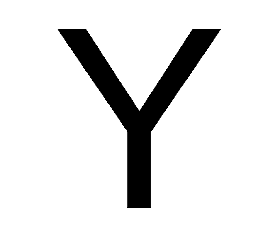

In [4]:
img_ori=cv2.imread('ydetec.png')

plt.imshow(img_ori,cmap='gray') 

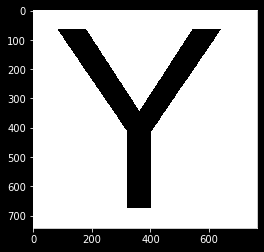

In [7]:
img_gray=cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
ret, img_binary=cv2.threshold(img_gray, 127,255, cv2.THRESH_BINARY)
plt.imshow(img_binary,cmap='gray')

openCV 에서는 다양한 이미지 유형이 있는데, cvtColor 은 이미지 속성을 바꾸는 함수이다.

threshhold 란 문턱값을 기준으로, 이미지 픽셀값이 문턱값보다 크면 어떤 고정된 값으로 할당하고, 
작으면 다른 고정된 값으로 할당하는 것이다. 반올림과 비슷하다. opencv 이미지 프로세싱에서 threshholding 을 적용하려면 grayscale이미지로 변환해 적용한다. 노이즈를 줄이는 역할을 한다. 

지금 이미지는 너무 선명해서 노이즈를 줄일 필요가 없지만, 이후 실사를 사용한다면 노이즈를 줄이는 것이 좋은 결과를 내는 관건이 될 것이다. 

cv2.THRESH 함수의 옵션은 다음과 같다.

cv2.THRESH_BINARY: 픽셀 값이 threshold_value 보다 크면 value, 작으면 0으로 할당
cv2.THRESH_BINARY_INV: 픽셀 값이 threshold_value 보다 크면 0, 작으면 value로 할당
cv2.THRESH_TRUNC: 픽셀 값이 threshold_value 보다 크면 threshold_value, 작으면 0으로 할당
cv2.THRESH_TOZERO_INV: 픽셀 값이 threshold_value 보다 크면 0, 작으면 픽셀 값 그대로 할당

지금 나는 픽셀의 값이 127이하면 0, 127 초과면 255로 할당하도록 설정해놓았다. 

첫 목표는 Y에서 갈라지는 부분의 점을 찾는 것이다. 

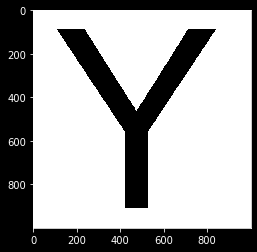

In [9]:
dst1 = cv2.resize(img_binary, dsize=(1000,1000), interpolation=cv2.INTER_AREA)
ret, dst=cv2.threshold(dst1, 127,255, cv2.THRESH_BINARY)
plt.imshow(dst,cmap='gray')

#편의상 이미지 크기를 1000x1000으로 다시 조정했다. 

In [10]:
L2=[]
for i in range(0,998):
    L1=[]
    for j in range(0,998):
        px1=dst[i,j]
        px2=dst[i,j+1]
        if (px1!=px2):
            L1.append(j)
    if (len(L1)==2):
        L2.append(i)
        
print(L2[0])

#이중포문을 돌려서 처음으로 흰-백의 경계가 두 개가 되는 지점(=갈라졌던게 모아지는 지점)을 찾았다.

462


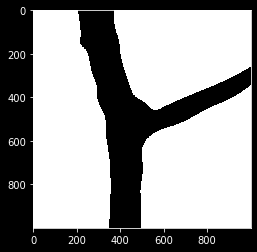

In [20]:
img_ori1=cv2.imread('tree1.jpg')
img_gray=cv2.cvtColor(img_ori1, cv2.COLOR_BGR2GRAY)
ret, img_binary=cv2.threshold(img_gray, 127,255, cv2.THRESH_BINARY)
plt.imshow(img_binary,cmap='gray')

# Y 말고 나무에 좀 더 가까운 흑백사진을 사용해 실제 구현할 알고리즘을 짜 보았다. 

사용할 변수가 많으므로 미리 정리해보았다. 

알고리즘은, 포문을 돌려서 split_spot을 찾은 후, 가지에 수직한 방향으로 선을 긋는 것이었다. 

가지의 기울기가 얼마냐? 를 찾는 것이 관건이었다. 이를 위해서 이미지의 전체적인 모양을 찾는 fitline 함수를 사용했다. 
![img](tree.jpg)

In [59]:
img_ori=cv2.imread('tree1.jpg') 
#cv2.imread로 사진을 불러온다. 테스트용으로 나무 사진은 이미 흑백으로 만들고 사용했다. 
img123=cv2.imread('img.jpg')

height=img_ori.shape[0]
width=img_ori.shape[1]

#height는 인덱스 0에 있고, width는 인덱스 1에 있다. 이미지 사이즈는 이와 같은 방법으로 얻는다. 

print(height,width)

1000 1000


In [35]:
#이후 사용할 함수를 위해서는 이미지를 적절히 잘라야 했기 때문에, 
#세로는 첫번째로 가지가 두 개 보이는 지점을 기준으로, 가로는 원본 이미지의 50% 를 기준으로 잘랐다. 

L2=[]

for i in range(0,height):
    L1=[]
    for j in range(1,width):
        px1=img_binary[i,j-1]
        px2=img_binary[i,j]
        if (px1!=px2):
            L1.append(j)
    if (len(L1)==3):
        L2.append(i)

y_maxHeight=L2[0]        
print(L2[0])

259


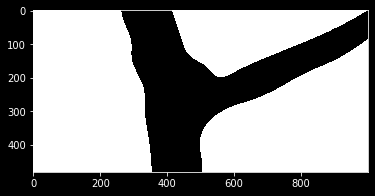

In [24]:
#이미지를 잘랐다. 

crop_img1=img_binary[y_maxHeight:(height-y_maxHeight),]

plt.imshow(crop_img1,cmap='gray')

In [36]:
crop_height=crop_img1.shape[0]

L3=[]
for i in range(0,crop_height):
    L4=[]
    for j in range(0,998):
        px1=crop_img1[i,j]
        px2=crop_img1[i,j+1]
        if (px1!=px2):
            L4.append(j)
    if (len(L4)==4):
        L3.append(i)
        split_spot_x=L4[1]
        
split_spot_y=L3[len(L3)-1]       
 

print(split_spot_y,split_spot_x)


198 552


In [37]:
L5=[]
for i in range(0,crop_height-1):
    px1=crop_img1[i,split_spot_x]
    px2=crop_img1[i+1,split_spot_x]
    if (px1!=px2):
            L5.append(i)
crop_variable_y=L5[1]
print(crop_variable_y)

#warning! 이 경우에만 해당되는 변수. 이 알고리즘의 약점을 나중에 발견해서 뜯어고쳤다. 

crop_variable_x=split_spot_x


#선그리기를 위한 좌표찾기 

306


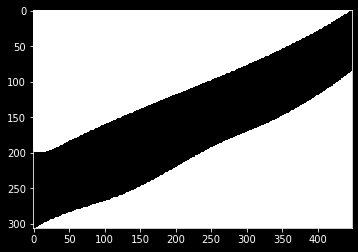

In [38]:
crop_img3=crop_img1[0:crop_variable_y,crop_variable_x:width]

plt.imshow(crop_img3,cmap='gray')

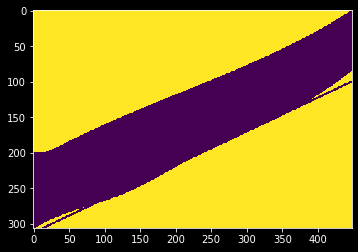

In [39]:
mode=cv2.RETR_EXTERNAL
method=cv2.CHAIN_APPROX_SIMPLE
img,contours,hierarchy=cv2.findContours(crop_img3,mode,method)
cnt=contours[0]

crop_img3_copy=crop_img3.copy()
rows,cols=crop_img3.shape[:2]
[vx,vy,x,y]=cv2.fitLine(cnt,cv2.DIST_L2,0,0.01,0.01)
y1=int((-x*vy/vx)+y)
y2=int(((cols-x)*vy/vx)+y)
cv2.line(crop_img3_copy,(0,y1),(cols-1,y2),(0,0,255),2)
plt.imshow(crop_img3_copy)

여기서 fitline이라는 함수를 쓰기 위해 각종 점들을 찾고 이미지를 잘랐다. fitline이란 직선 근사를 하는 함수이다. 

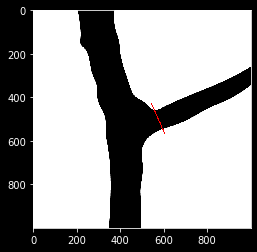

In [40]:
tan_angle=(y1-y2)/(cols-1) #나뭇가지의 각도를 찾았다. 
x=crop_variable_y-split_spot_y
y=x*tan_angle
end_x=split_spot_x+y
end_y=split_spot_y+x
draw=cv2.line(img_ori1,(int(split_spot_x-10),int(y_maxHeight+split_spot_y-30)),(int(end_x),int(y_maxHeight+end_y)),(255,0,0),4)
plt.imshow(draw,cmap='gray')

이와 같은 과정으로 나무 전정 가이드라인을 그릴 수 있다! 

이 알고리즘이 제대로 작동하는지 알기 위해, 다른 나무 사진으로 테스트해보았다. 

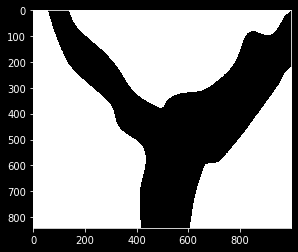

In [89]:
img_ori2=cv2.imread('tree2.jpg')
img123=cv2.imread('img.jpg')
img_gray2=cv2.cvtColor(img_ori2, cv2.COLOR_BGR2GRAY)
ret, img_binary2=cv2.threshold(img_gray2, 127,255, cv2.THRESH_BINARY)

height=img_ori2.shape[0]
width=img_ori2.shape[1]

L2=[]

for i in range(0,height):
    L1=[]
    for j in range(1,width):
        px1=img_binary2[i,j-1]
        px2=img_binary2[i,j]
        if (px1!=px2):
            L1.append(j)
    if (len(L1)==3):
        L2.append(i)

y_maxHeight=L2[0]        

crop_img1=img_binary2[y_maxHeight:(height-y_maxHeight),]

crop_height=crop_img1.shape[0]

L3=[]
for i in range(0,crop_height):
    L4=[]
    for j in range(0,998):
        px1=crop_img1[i,j]
        px2=crop_img1[i,j+1]
        if (px1!=px2):
            L4.append(j)
    if (len(L4)==4):
        L3.append(i)
        split_spot_x=L4[1]
        
split_spot_y=L3[len(L3)-1]  

plt.imshow(crop_img1,cmap='gray')

In [67]:
L5=[]
for i in range(0,crop_height-1):
    px1=crop_img1[i,split_spot_x]
    px2=crop_img1[i+1,split_spot_x]
    if (px1!=px2):
            L5.append(i)
crop_variable=L5[1]
print(crop_variable)

#선그리기를 위한 좌표찾기 

IndexError: list index out of range

그리고 이렇게 위와 동일한 코드를 실행시켜 보면 오류가 난다. list index out of range 라는데, 이유는 첫 번째 사진에서는 split_spot이 있는 Y 축 상에 흑-백이 바뀌는 지점이 있는데, 두 번째 사진에서는 split_spot이 있는 Y축 상에 흑색이 계속되므로 crop_variable을 찾을 수 없었던 것이다. 

In [55]:
img_test1=cv2.imread('점선1.png')
img_test2=cv2.imread('점선2.png') 

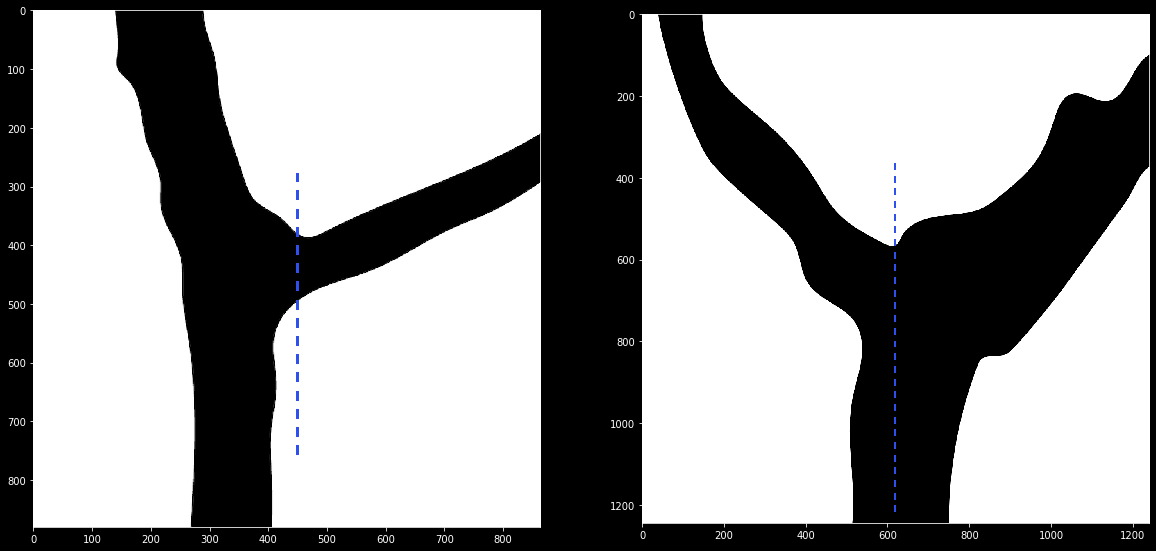

In [56]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img_test2, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img_test1, cmap='gray')

그래서 새로운 알고리즘을 적용했다. openCV의 cv2.approxPolyDP라는 함수이다.

cv2.approxPolyDP() 함수는 인자로 주어진 곡선 또는 다각형을 epsilon 값에 따라 꼭지점 수를 줄여 새로운 곡선이나 다각형을 생성해 리턴한다. 

cv2.approxPolyDP(cnt,epsilon,True)

cnt: numpy array 형식의 곡선 또는 다각형. 위 코드에서는 contour 을 입력함. 

epsilon: 근사 정확도를 위한 값. 오리지널 커브와 근사 커브 간 거리의 최대값으로 사용. 
다각형의 직선과의 허용 거리. epsilon 이 크면 approxCurve 에 저장되는 좌표점의 개수가 적어진다. 

True: True 이면 폐곡선, False 이면 양 끝이 열려있는 곡선임을 의미. 

cv2.arcLength(curve, closed) : 길이 측정 함수 

이 함수의 결과로 나온 점들 중 split_spot과 가장 가까운 점을 crop_variable 로 쓸 것이다. 

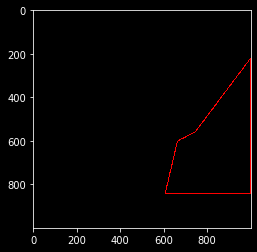

In [71]:
mode=cv2.RETR_EXTERNAL
method=cv2.CHAIN_APPROX_SIMPLE
img,contours,hierarchy=cv2.findContours(crop_img1,mode,method)
cnt=contours[0]

poly=cv2.approxPolyDP(cnt,epsilon=30,closed=True)
img_approxi=cv2.drawContours(img123,[poly],0,(255,0,0),3)
plt.imshow(img_approxi)

In [74]:
print(type(poly))
print(poly)

<class 'numpy.ndarray'>
[[[999 219]]

 [[744 558]]

 [[662 601]]

 [[606 841]]

 [[999 841]]]


approxPolyDP함수의 결과로 poly가 나왔는데, 이는 ndarray로 내가 잘 몰라서 다루기 어려운 자료형이다. 여기에는 함수로 찍은 점들의 좌표가 담겨있다. 이걸 딕셔너리 자료형으로 바꿔서 접근할 것이다. 

In [75]:
poly_list=poly.tolist()
print(poly_list)

[[[999, 219]], [[744, 558]], [[662, 601]], [[606, 841]], [[999, 841]]]


In [77]:
poly_len=len(poly)
poly_dic1={}
for i in range(poly_len-1):
    poly_dic1[i]=(poly_list[i][0][0],poly_list[i][0][1])
print(poly_dic1)

{0: (999, 219), 1: (744, 558), 2: (662, 601), 3: (606, 841)}


In [78]:
poly_dic2={}
for i in range(poly_len-1):
    x=(split_spot_x-poly_list[i][0][0])*(split_spot_x-poly_list[i][0][0])
    y=(split_spot_y-poly_list[i][0][1])*(split_spot_y-poly_list[i][0][1])
    a=x+y
    poly_dic2[i]=a
    
print(poly_dic2)

{0: 263698, 1: 197608, 2: 195001, 3: 430425}


In [79]:
poly_dic2_min=min(poly_dic2.values())
print(poly_dic2_min)

195001


In [81]:
def get_key(val):
    for key,value in poly_dic2.items():
        if val==value:
            return key
#가장 가까운 길이를 찾아서, 그 밸류값을 가지는 키값을 찾았다.       

In [82]:
crop_key=get_key(poly_dic2_min)

print(crop_key)


2


In [84]:
crop_variable=poly_dic1[crop_key]

print(crop_variable)

#이 점을 crop_variable로 쓸 것이다. 

(662, 601)


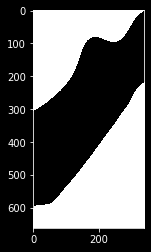

In [85]:
crop_variable_x=crop_variable[0]
crop_variable_y=crop_variable[0]
crop_img3=crop_img1[0:crop_variable_y,crop_variable_x:width]
plt.imshow(crop_img3,cmap='gray')

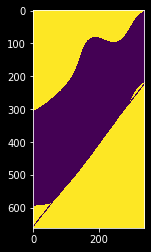

In [88]:
mode=cv2.RETR_EXTERNAL
method=cv2.CHAIN_APPROX_SIMPLE
img,contours,hierarchy=cv2.findContours(crop_img3,mode,method)
cnt=contours[0]

crop_img3_copy=crop_img3.copy()
rows,cols=crop_img3.shape[:2]
[vx,vy,x,y]=cv2.fitLine(cnt,cv2.DIST_L2,0,0.01,0.01)
y1=int((-x*vy/vx)+y)
y2=int(((cols-x)*vy/vx)+y)
cv2.line(crop_img3_copy,(0,y1),(cols-1,y2),(0,0,255),2)
plt.imshow(crop_img3_copy)

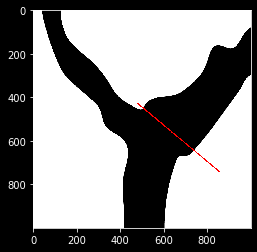

In [90]:
tan_angle=(y1-y2)/(cols-1)

x=crop_variable_y-split_spot_y
y=x*tan_angle

end_x=split_spot_x+y
end_y=split_spot_y+x

draw=cv2.line(img_ori2,(int(split_spot_x-10),int(y_maxHeight+split_spot_y-30)),(int(end_x),int(y_maxHeight+end_y)),(255,0,0),4)
plt.imshow(draw,cmap='gray')

원하는 모양대로 선이 그려지는 것을 볼 수 있다. 

이제 해야 할 것은 실사를 테스트용으로 쓴 사진같이 나무만 까맣게 만드는 것이었다. 

opencv에는 다양한 노이즈 제거 함수들이 있다.

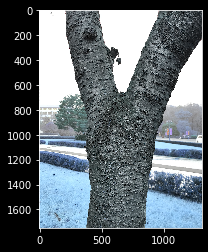

In [91]:
img_real = cv2.imread('real_img.jpg')
plt.imshow(img_real, cmap='gray')

In [94]:
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)
imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)
img_inversed= cv2.bitwise_not(imgTopHat)

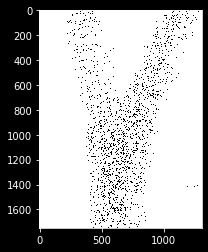

In [76]:
ret, img_inverse=cv2.threshold(img_inversed,200,255, cv2.THRESH_BINARY)
plt.imshow(img_inverse, cmap='gray')

아주 여러가지 노이즈 감소 함수를 실험해본 결과 위와 같은 방법이 그나마 가장 정확히 나무만 검출했다. 

cv2.morphologyEx라는 함수를 사용한건데, erosion과 dilation을 활용한 opening 방법을 사용했다. 

이미지 Erosion(침식) 과 Dilation(팽창): 

erosion을 적용하면 이미지가 가늘어지고 작은 object가 제거된다. 
dilation을 적용하면 이미지가 굵어진다. 경계가 부드러워지고 구멍이 메꿔진다. 

![img](erosion_dilation.png)

opencv에는 노이즐 제거할 때 opening 과 closing 이라는 이미지 변형 방법을 쓴다. 

opening: erosion을 한 후 바로 dilation을 함. 작은 object 제거에 적합.  

closing: dilation을 한 후 erosion을 함. 전체적인 윤곽 파악에 적합. 

cv2.morphologyEx()는 erosion과 dilation을 이용해서 이미지를 변형한다. 

cv2.morpholoryEx(src,operaion,kernel):

operation종류 -

cv2.MORPH_OPEN: opening을 함.

cv2.MORPH_CLOSE: closing을 함. 

cv2.MORPH_GRADIENT: dilation 이미지와 erosion 이미지의 차이를 나타낸다. 

cv2.MORPH_TOPHAT: 원본과 opening이미지의 차이를 나타낸다. 

cv2.MORPH_BLACKHAT: 원본과 closing이미지의 차이를 나타낸다. 


또 다른 방법은 나무의 색깔로 나무를 검출하는 방법이다. inRange 함수를 쓰면, lowerb1과 upperb1 사이의 RGB 색상을 가지는 요소를 검출한다. 

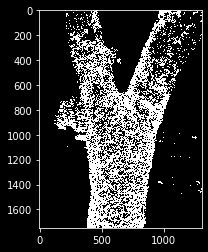

In [95]:
hsv1=cv2.cvtColor(img_real, cv2.COLOR_BGR2HSV)
lowerb1=(20,20,20)
upperb1=(120,120,120)
dst1=cv2.inRange(hsv1,lowerb1,upperb1)

plt.imshow(dst1, cmap='gray')

하지만 이 두 방법 모두 나무의 그림자, 배경, 빛 등에 영향을 받아 그 사진의 특성에 맞게 값을 조절해주어야만 나무를 잘 검출할 수 있다는 단점이 있다. 그리고 내가 위에서 만든 알고리즘은 흰 픽셀 검은 픽셀을 세서 위치를 찾아내는 방식이라 노이즈에 매우 취약하다. 이후 파이썬 keras 를 공부해서 머신러닝으로 나무를 검출하는 방식을 개발하는 것이 좋을 것 같다. 
그리고 나무를 정확히 검출할 수 있다면, 사진으로 검출하는 것 뿐 아니라 동영상에서도 실시간으로 전정 가이드라인을 표시하는 프로그램도 짜보고 싶다. 